In [1]:
import sys
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')
from envir import config

### 1. Visualize the relationship between SPL and YAMNet data

#### I. Loading Data

<li>Load the dataset with index at minute level

In [2]:
df = pd.read_csv(config.dataFol+'all_cleaned_wsp_sonyc_birds.csv')

In [3]:
df.shape

(756880, 28)

#### II. Processing Data

In [4]:
# split into year, month, day, hour in UTC and in Local Time Zone (EST)
df['timestamp_utc'] = pd.to_datetime(df.timestamp_utc)
df['year'] = pd.DatetimeIndex(df.timestamp_utc).year
df['month'] = pd.DatetimeIndex(df.timestamp_utc).month
df['day'] = pd.DatetimeIndex(df.timestamp_utc).day
df['hour'] = pd.DatetimeIndex(df.timestamp_utc).hour

df['localtime'] = pd.to_datetime(df.timestamp_utc).dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df['localyear'] = pd.DatetimeIndex(df.localtime).year
df['localmonth'] = pd.DatetimeIndex(df.localtime).month
df['localday'] = pd.DatetimeIndex(df.localtime).day
df['localhour'] = pd.DatetimeIndex(df.localtime).hour


In [5]:
#get week of year 
df['weeknumber'] = df['timestamp_utc'].dt.week
#get day of year
df['dayofyear'] = df['timestamp_utc'].dt.dayofyear

In [6]:
df.head()

,timestamp_utc,sonyc_sensor_id,sonyc_sensor_name,dBAS_lin_mean,l1,l10,l5,l90,count_of_positive_predictions,pct_positive_predictions,...,month,day,hour,localtime,localyear,localmonth,localday,localhour,weeknumber,dayofyear
0,2017-03-02 07:00:00,b827eb815321,19 Washington Square North,59.166330,66.6600,64.664,65.864500,52.550,0.0,0.04918,...,3,2,7,2017-03-02 02:00:00-05:00,2017,3,2,2,9,61
1,2017-03-02 07:00:00,b827eb0fedda,Juan Carlos,53.477207,61.8205,53.870,55.319000,51.549,0.0,0.03333,...,3,2,7,2017-03-02 02:00:00-05:00,2017,3,2,2,9,61
2,2017-03-02 07:00:00,b827eb1685c7,Shimkin Reading Room,61.856247,70.3921,63.218,68.984000,58.510,0.0,0.00000,...,3,2,7,2017-03-02 02:00:00-05:00,2017,3,2,2,9,61
3,2017-03-02 07:01:00,b827eb815321,19 Washington Square North,57.641624,65.6847,61.611,63.781998,52.209,0.0,0.04918,...,3,2,7,2017-03-02 02:01:00-05:00,2017,3,2,2,9,61
4,2017-03-02 07:01:00,b827eb0fedda,Juan Carlos,60.136166,68.6936,64.030,67.075000,52.408,0.0,0.03333,...,3,2,7,2017-03-02 02:01:00-05:00,2017,3,2,2,9,61


In [7]:
df.columns

Index(['timestamp_utc', 'sonyc_sensor_id', 'sonyc_sensor_name',
       'dBAS_lin_mean', 'l1', 'l10', 'l5', 'l90',
       'count_of_positive_predictions', 'pct_positive_predictions',
       'avg_mtr_#/km/h', 'avg_mt_#/km', 'avg_height_m', 'temp_celcius',
       'dewp_celcius', 'rh_percentage', 'wind_dir', 'wind_speed_mph',
       'sea_level_pressure_mb', 'precipitation_mm', 'visibility_miles',
       'gust_mph', 'peak_wind_gust_mph', 's_19WashingtonSquareNorth',
       's_juanCarlos', 's_shimkinReadingRoom', 's_4WashingtonSquareNorth',
       's_kimmelCenter', 'year', 'month', 'day', 'hour', 'localtime',
       'localyear', 'localmonth', 'localday', 'localhour', 'weeknumber',
       'dayofyear'],
      dtype='object')

#### III. Visualization

<b>i. Scatter plot: x="dBAS_lin_mean", y="pct_positive_predictions" (by year)</b>



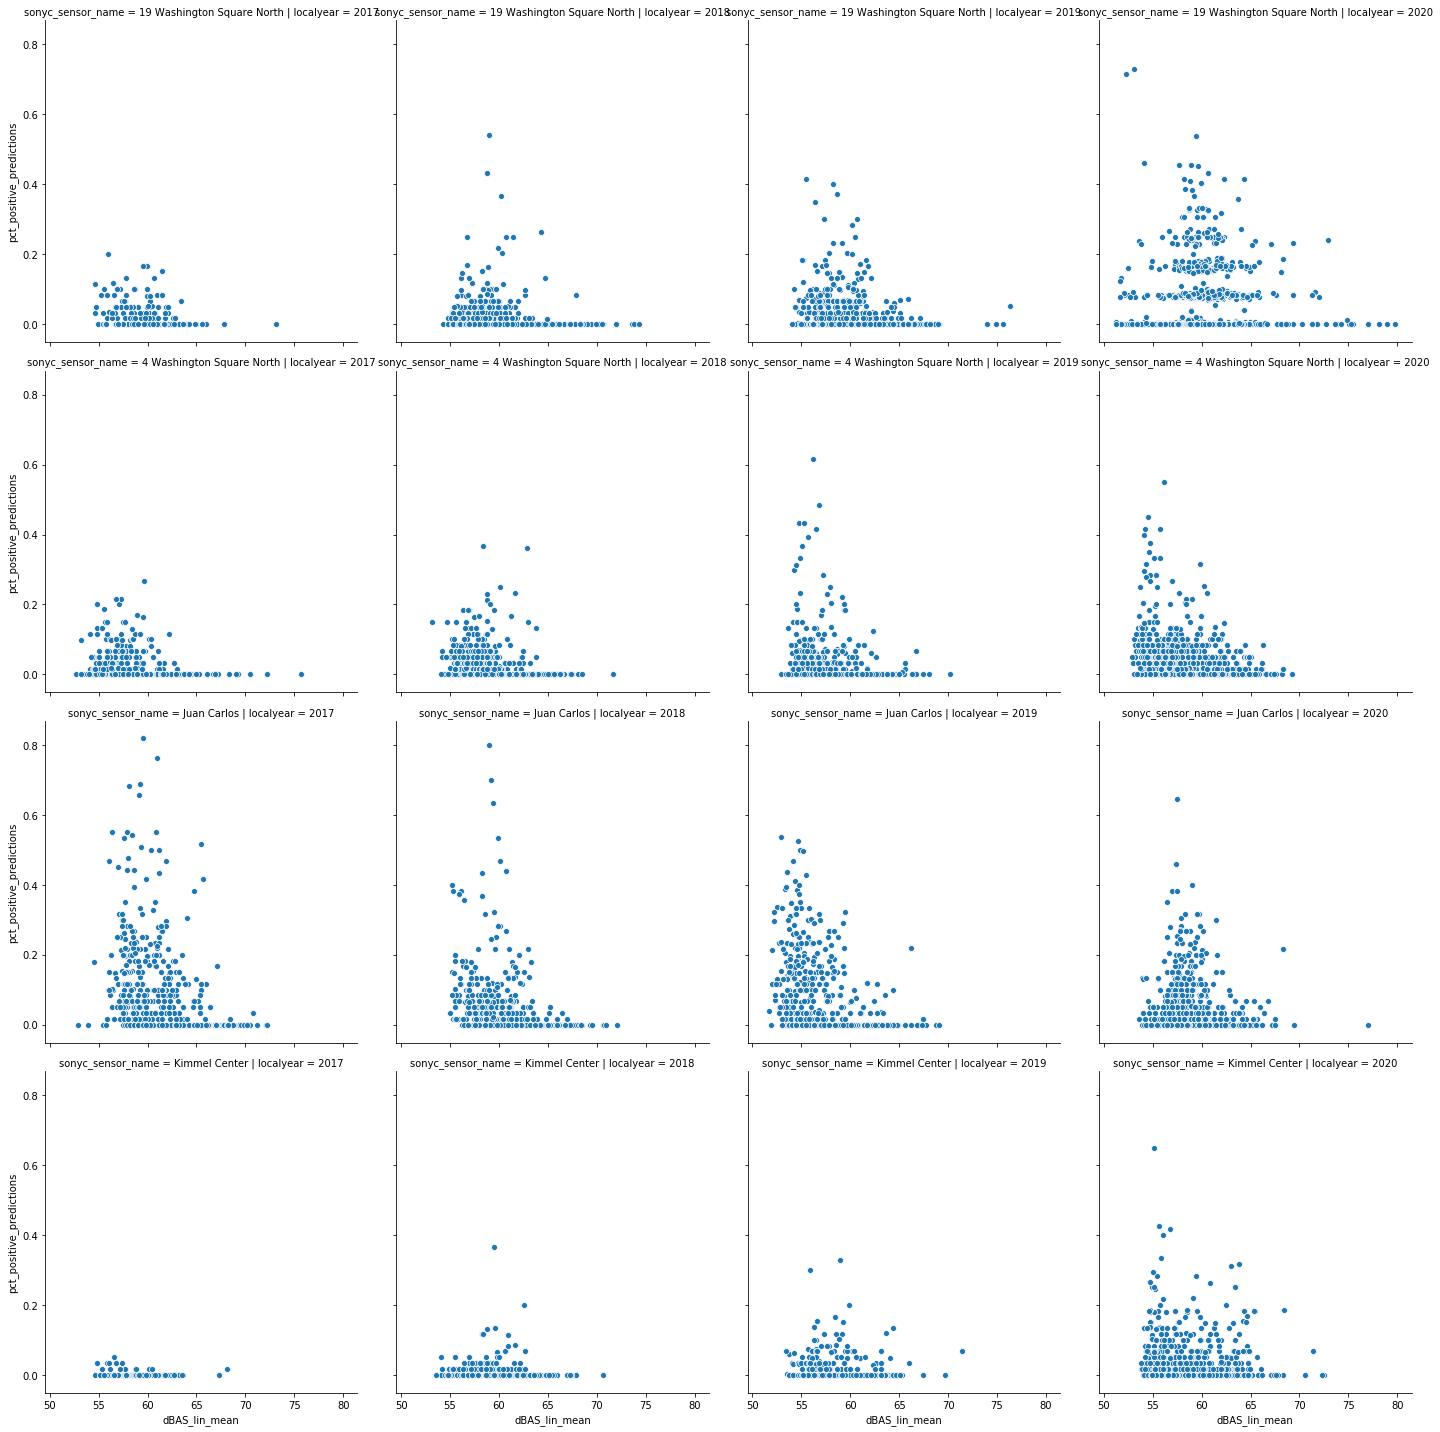

In [8]:
sns.relplot(x="dBAS_lin_mean", y="pct_positive_predictions",
            col="localyear", row="sonyc_sensor_name",
            data=df[(df['sonyc_sensor_name'] != 'Shimkin Reading Room') ][['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())

<b>ii. Scatter plot: x="dBAS_lin_mean", y="pct_positive_predictions" (by year by local hour in range [6,8]) </b>



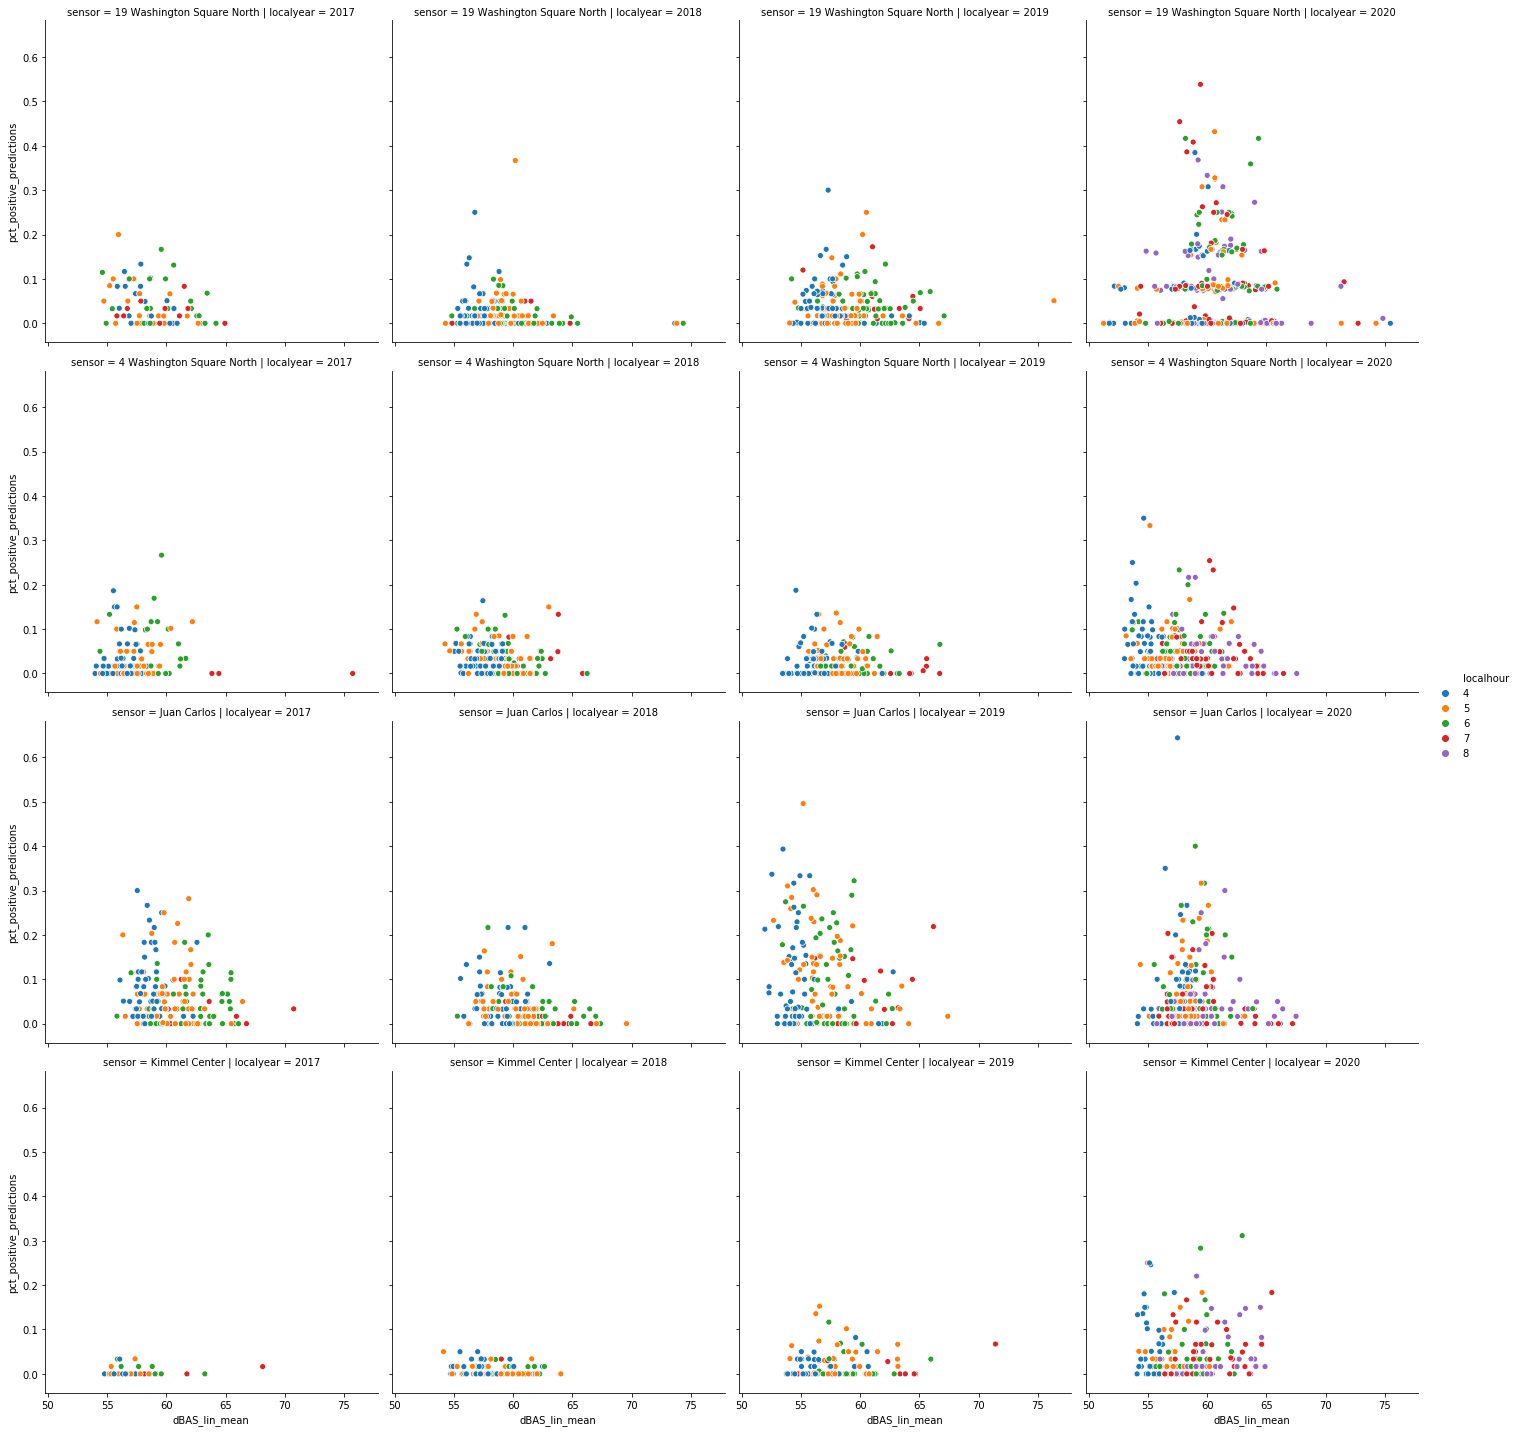

In [9]:
sns.relplot(x="dBAS_lin_mean", y="pct_positive_predictions",
            col="localyear", row="sensor", hue = 'localhour', palette = 'tab10', 
            data=df[(df.localhour>=4) & (df.localhour <=8) & (df['sonyc_sensor_name'] != 'Shimkin Reading Room')\
                                                           ][['sonyc_sensor_name', 'localyear',
                                                            'localmonth', 'localday', 'localhour',
                                                            'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index()\
            .rename(columns = {'sonyc_sensor_name':'sensor'}))

#### iii. Create a new dataframe df_new that excludes 'Shimkin Reading Room' with localhour in range [4am, 8am]
<p>The 'Shimkin Reading Room' sensor does not record a lot of useful bird data.


In [10]:
df.shape

(756880, 39)

In [11]:
df.sonyc_sensor_name.unique()

array(['19 Washington Square North', 'Juan Carlos',
       'Shimkin Reading Room', '4 Washington Square North',
       'Kimmel Center'], dtype=object)

In [12]:
df_new= df[(df['sonyc_sensor_name'].isnull() == False) &(df.localhour>=4) & (df.localhour <=8) &\
            (df['sonyc_sensor_name'] != 'Shimkin Reading Room')].copy()
df_new.shape

(147050, 39)

In [13]:
df_new.sonyc_sensor_name.unique()

array(['19 Washington Square North', 'Juan Carlos',
       '4 Washington Square North', 'Kimmel Center'], dtype=object)

<b>(a) Joint plot: x="dBAS_lin_mean", y="pct_positive_predictions"  (y includes zero values)</b>


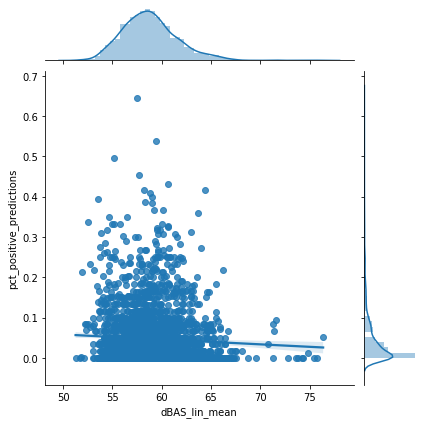

In [14]:
sns.jointplot(x="dBAS_lin_mean", y="pct_positive_predictions", kind="reg",
            data=df_new[['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())


<b>(b) Joint plot: x="dBAS_lin_mean", y="pct_positive_predictions"  (y excludes zero values)</b>


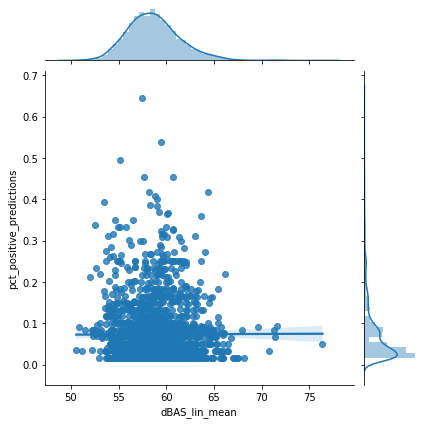

In [15]:
sns.jointplot(x="dBAS_lin_mean", y="pct_positive_predictions", kind="reg",
            data=df_new[(df_new.pct_positive_predictions > 0)][['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())


<b>(c) Joint plot (kind = 'kde'): x="dBAS_lin_mean", y="pct_positive_predictions"  (y excludes zero values)</b>


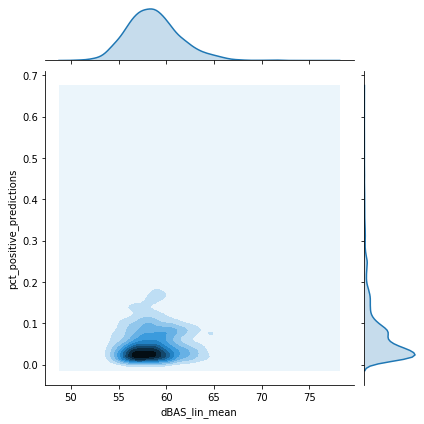

In [16]:
sns.jointplot(x="dBAS_lin_mean", y="pct_positive_predictions", kind="kde",
            data=df_new[(df_new.pct_positive_predictions > 0)][['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())


<b>iv. Make a normality test on the distribution of pct_positive_predictions vs. dBAS_lin_mean

In [17]:
df_normal_test = df_new[(df_new.pct_positive_predictions > 0)][['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name','localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index()

In [18]:
df_normal_test.shape

(1958, 7)

The q-q plot shows that the data is nearly a normal distribution.

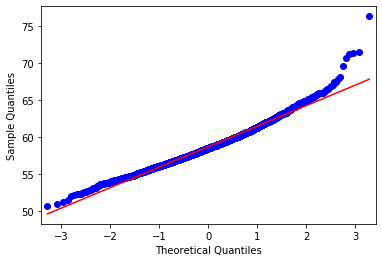

In [19]:
from statsmodels.graphics.gofplots import qqplot

data = df_normal_test.dBAS_lin_mean
# q-q plot
qqplot(data, line='s')
plt.show()

The histogram shows that the data is slightly skewed to the right tail.

Text(0.5, 1.0, 'dBAS_lin_mean Histogram')

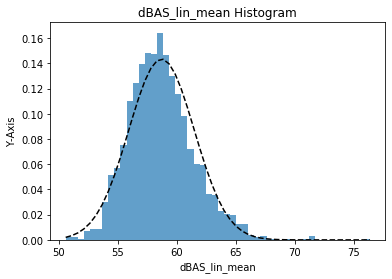

In [20]:
data = df_normal_test.dBAS_lin_mean
mu = data.mean()
sigma = data.std()
num_bins = 50
   
n, bins, patches = plt.hist(data, num_bins,density = 1,  alpha = 0.7) 
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
 
plt.plot(bins, y, '--', color ='black') 
  
plt.xlabel('dBAS_lin_mean') 
plt.ylabel('Y-Axis') 
  
plt.title('dBAS_lin_mean Histogram') 

In [21]:
print('The 99.7% confidence interval:')
print('[ {}, {} ]'.format(mu-3*sigma,mu+3*sigma))

The 99.7% confidence interval:
[ 50.3488773409398, 67.0292346073409 ]


### 2. Visualize the relationship between time and YAMNet data

<b>Scatter plot: x="localhour", y="pct_positive_predictions" (by year) </b>


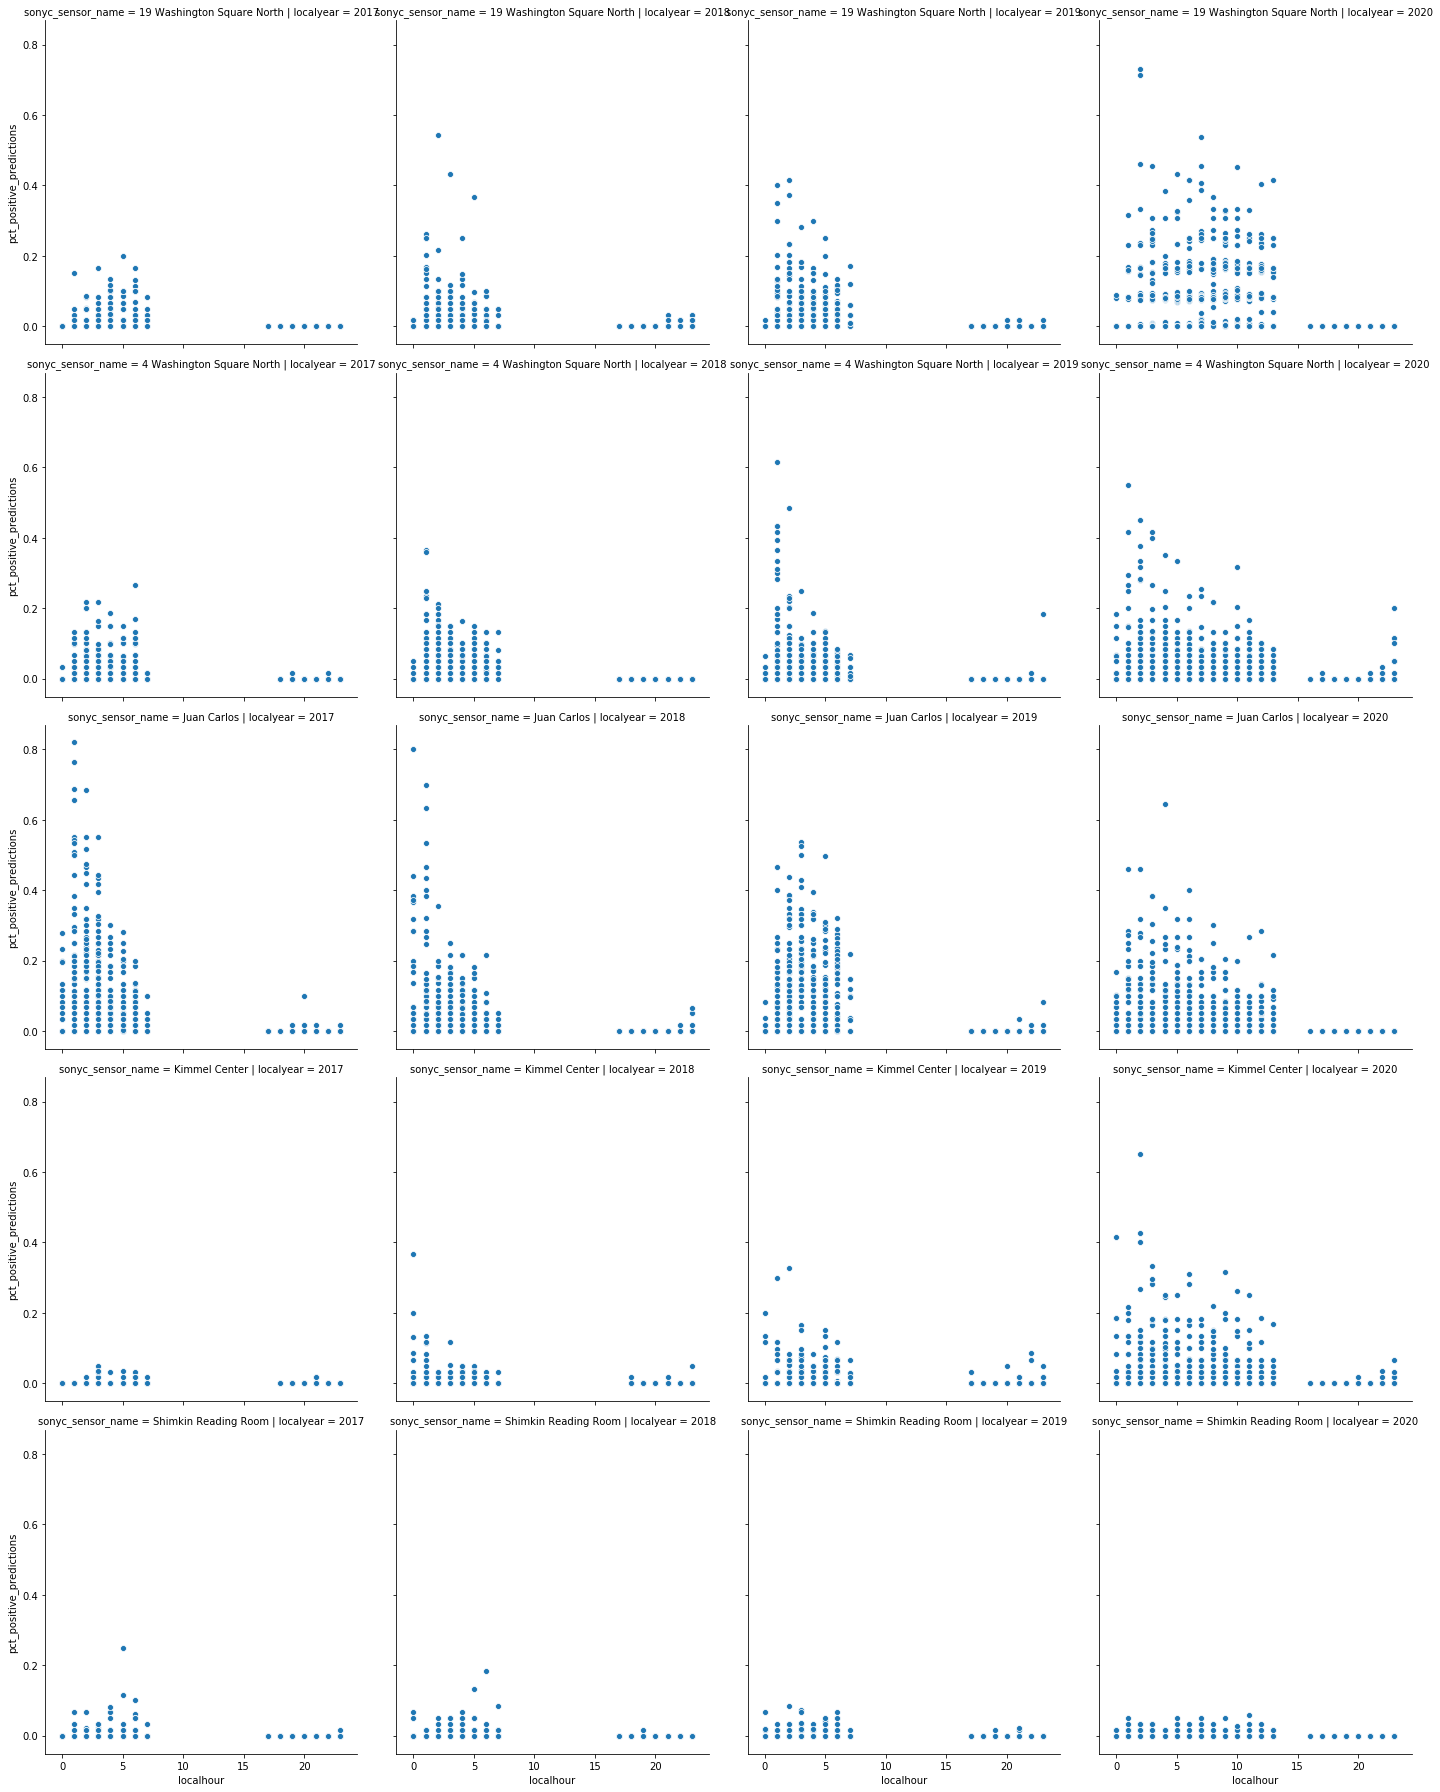

In [22]:
#Distribution of pct_positive_predictions over 24 hour
sns.relplot(x="localhour", y="pct_positive_predictions",
            col="localyear", row="sonyc_sensor_name", 
            data=df[['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())

### 5. Check the correlation table of some features

In [23]:
df_corr = df_new[['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour','dBAS_lin_mean',\
              'l1','l5','l10','l90',\
             'pct_positive_predictions','precipitation_mm','temp_celcius','wind_speed_mph']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean()

corr = df_corr.corr()
 
corr

,dBAS_lin_mean,l1,l5,l10,l90,pct_positive_predictions,precipitation_mm,temp_celcius,wind_speed_mph
dBAS_lin_mean,1.000000,0.915234,0.950045,0.980665,0.819344,-0.053347,0.237816,0.140246,0.079249
l1,0.915234,1.000000,0.984237,0.950582,0.541684,-0.052298,0.216688,0.069024,0.078715
l5,0.950045,0.984237,1.000000,0.984441,0.616964,-0.055732,0.228236,0.087475,0.074494
l10,0.980665,0.950582,0.984441,1.000000,0.721113,-0.055151,0.238626,0.127801,0.070254
l90,0.819344,0.541684,0.616964,0.721113,1.000000,-0.028826,0.191589,0.229140,0.062287
pct_positive_predictions,-0.053347,-0.052298,-0.055732,-0.055151,-0.028826,1.000000,-0.044260,0.125028,-0.060673
precipitation_mm,0.237816,0.216688,0.228236,0.238626,0.191589,-0.044260,1.000000,0.115204,0.120367
temp_celcius,0.140246,0.069024,0.087475,0.127801,0.229140,0.125028,0.115204,1.000000,-0.099377
wind_speed_mph,0.079249,0.078715,0.074494,0.070254,0.062287,-0.060673,0.120367,-0.099377,1.000000


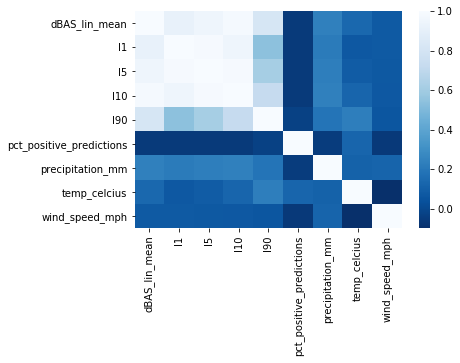

In [24]:
# Heatmap
sns.heatmap(corr, cmap = 'Blues_r')

### 5. Regression Modeling 

In [25]:
import statsmodels.formula.api as smf     #For regression model
from sklearn.preprocessing import StandardScaler   #For standardization

#### I. Loading & Processing  Data 

<p>This time, we load the dataset with hourly index

In [26]:
#read in the file indexed by hour
df_byhour = pd.read_csv(config.dataFol+'all_cleaned_wsp_sonyc_birds_by_hour.csv')

In [27]:
# split into year, month, day, hour in UTC and in Local Time Zone (EST)
df_byhour['timestamp_utc'] = pd.to_datetime(df_byhour.timestamp_utc)
df_byhour['year'] = pd.DatetimeIndex(df_byhour.timestamp_utc).year
df_byhour['month'] = pd.DatetimeIndex(df_byhour.timestamp_utc).month
df_byhour['day'] = pd.DatetimeIndex(df_byhour.timestamp_utc).day
df_byhour['hour'] = pd.DatetimeIndex(df_byhour.timestamp_utc).hour

df_byhour['localtime'] = pd.to_datetime(df_byhour.timestamp_utc).dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df_byhour['localyear'] = pd.DatetimeIndex(df_byhour.localtime).year
df_byhour['localmonth'] = pd.DatetimeIndex(df_byhour.localtime).month
df_byhour['localday'] = pd.DatetimeIndex(df_byhour.localtime).day
df_byhour['localhour'] = pd.DatetimeIndex(df_byhour.localtime).hour


In [28]:
#get week of year 
df_byhour['week_number'] = df_byhour['timestamp_utc'].dt.week
#get day of year
df_byhour['day_of_year'] = df_byhour['timestamp_utc'].dt.dayofyear

In [29]:
df_byhour.shape

(84894, 39)

In [30]:
df_byhour.sonyc_sensor_name.unique()

array(['19 Washington Square North', nan, 'Silver lab', 'Juan Carlos',
       'Shimkin Reading Room', '4 Washington Square North',
       'Kimmel Center'], dtype=object)

In [31]:
#exclude the 'Shimkin Reading Room' and 'Silver lab' sensor 
#because we don't have YAMNet predication data for 'Silver Lab' sensor
#and 'Shimkin Reading Room' sensor captured little bird calls

df_new= df_byhour[(df_byhour['sonyc_sensor_name'].isnull() == False) &(df_byhour.localhour>=4) & (df_byhour.localhour <=8) &\
            (df_byhour['sonyc_sensor_name'] != 'Shimkin Reading Room') & (df_byhour['sonyc_sensor_name'] != 'Silver lab')].copy()
df_new.rename(columns={'avg_mt_#/km':'avg_mt_km','avg_mtr_#/km/h':'avg_mtr_kmh'}, inplace = True)

In [32]:
df_new.sonyc_sensor_name.unique()

array(['19 Washington Square North', 'Juan Carlos',
       '4 Washington Square North', 'Kimmel Center'], dtype=object)

#### II. Uni-variate linear regression

<li> Try to fit a linear regression model with only the dBAS_lin_mean feature

(a) Formula: pct_positive_predictions~dBAS_lin_mean-1 (WITHOUT INTERCEPT)

In [33]:
lm = smf.ols(formula='pct_positive_predictions~dBAS_lin_mean-1', data = df_new).fit()
print(lm.summary())

                                    OLS Regression Results                                   
Dep. Variable:     pct_positive_predictions   R-squared (uncentered):                   0.318
Model:                                  OLS   Adj. R-squared (uncentered):              0.317
Method:                       Least Squares   F-statistic:                              1701.
Date:                      Sun, 19 Jul 2020   Prob (F-statistic):                   1.06e-305
Time:                              20:46:24   Log-Likelihood:                          5235.2
No. Observations:                      3657   AIC:                                 -1.047e+04
Df Residuals:                          3656   BIC:                                 -1.046e+04
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
                    coef    std err          t      P>|t|   

(b) Formula: pct_positive_predictions~dBAS_lin_mean (WITH INTERCEPT)


In [34]:
lm2 = smf.ols(formula='pct_positive_predictions~dBAS_lin_mean', data = df_new).fit()
print(lm2.summary())

                               OLS Regression Results                               
Dep. Variable:     pct_positive_predictions   R-squared:                       0.023
Model:                                  OLS   Adj. R-squared:                  0.023
Method:                       Least Squares   F-statistic:                     85.72
Date:                      Sun, 19 Jul 2020   Prob (F-statistic):           3.44e-20
Time:                              20:46:24   Log-Likelihood:                 5305.7
No. Observations:                      3657   AIC:                        -1.061e+04
Df Residuals:                          3655   BIC:                        -1.059e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

The performance is not good for the model with intercept.

#### iii. Multi-variate regression 

In [35]:
print(df_new.columns)

Index(['timestamp_utc', 'sonyc_sensor_id', 'sonyc_sensor_name',
       'dBAS_lin_mean', 'l1', 'l10', 'l5', 'l90',
       'count_of_positive_predictions', 'pct_positive_predictions',
       'avg_mtr_kmh', 'avg_mt_km', 'avg_height_m', 'temp_celcius',
       'dewp_celcius', 'rh_percentage', 'wind_dir', 'wind_speed_mph',
       'sea_level_pressure_mb', 'precipitation_mm', 'visibility_miles',
       'gust_mph', 'peak_wind_gust_mph', 's_19WashingtonSquareNorth',
       's_juanCarlos', 's_shimkinReadingRoom', 's_4WashingtonSquareNorth',
       's_kimmelCenter', 'year', 'month', 'day', 'hour', 'localtime',
       'localyear', 'localmonth', 'localday', 'localhour', 'week_number',
       'day_of_year'],
      dtype='object')


#### (a) Regression on all factors

In [36]:
#general possible factors
factors = ['dBAS_lin_mean','l1', 'l10', 'l5', 'l90', 'avg_height_m', 'avg_mt_km', 'avg_mtr_kmh', 
           'temp_celcius', 'dewp_celcius','gust_mph','peak_wind_gust_mph','rh_percentage',
        'wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb','precipitation_mm', 'visibility_miles']

#time-related factors 
factors_temporal = ['localyear','localmonth','localhour','day_of_year']  

#location-related factors 
factors_spatial = ['s_19WashingtonSquareNorth','s_juanCarlos', 's_4WashingtonSquareNorth','s_kimmelCenter']

In [37]:
print('The number of factors: ',len(factors+factors_temporal+factors_spatial))

The number of factors:  26


In [38]:
formula = 'pct_positive_predictions~'+ '+'.join(factors) + \
                    '+'+'+'.join(factors_temporal) +\
                    '+'+'+'.join(factors_spatial) 
formula

'pct_positive_predictions~dBAS_lin_mean+l1+l10+l5+l90+avg_height_m+avg_mt_km+avg_mtr_kmh+temp_celcius+dewp_celcius+gust_mph+peak_wind_gust_mph+rh_percentage+wind_dir+wind_speed_mph+sea_level_pressure_mb+precipitation_mm+visibility_miles+localyear+localmonth+localhour+day_of_year+s_19WashingtonSquareNorth+s_juanCarlos+s_4WashingtonSquareNorth+s_kimmelCenter'

In [39]:
#(WITH INTERCEPT)
lm = smf.ols(formula=formula, data = df_new).fit()
print(lm.summary())

                               OLS Regression Results                               
Dep. Variable:     pct_positive_predictions   R-squared:                       0.256
Model:                                  OLS   Adj. R-squared:                  0.171
Method:                       Least Squares   F-statistic:                     3.022
Date:                      Sun, 19 Jul 2020   Prob (F-statistic):           7.02e-06
Time:                              20:46:24   Log-Likelihood:                 441.01
No. Observations:                       246   AIC:                            -830.0
Df Residuals:                           220   BIC:                            -738.9
Df Model:                                25                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

#### (b) Regression on standardized factors + temporal facotors + spatial factors 

In [40]:
scaler = StandardScaler() 
#Adding standardized columns for each factor
for factor in factors: 
    df_new[factor+'_z']=scaler.fit_transform(np.array(df_new[factor]).reshape(-1, 1))

In [41]:
#Testing: the mean of standardized column is  zero; the std is 1
np.mean(df_new['dBAS_lin_mean_z']),np.std(df_new['dBAS_lin_mean_z'])

(8.966312739382655e-16, 1.0)

In [42]:
#All standardized factors 
factors_z = [factor+'_z' for factor in factors]
factors_z

['dBAS_lin_mean_z',
 'l1_z',
 'l10_z',
 'l5_z',
 'l90_z',
 'avg_height_m_z',
 'avg_mt_km_z',
 'avg_mtr_kmh_z',
 'temp_celcius_z',
 'dewp_celcius_z',
 'gust_mph_z',
 'peak_wind_gust_mph_z',
 'rh_percentage_z',
 'wind_dir_z',
 'wind_speed_mph_z',
 'sea_level_pressure_mb_z',
 'precipitation_mm_z',
 'visibility_miles_z']

In [43]:
formula_z = 'pct_positive_predictions~'+ '+'.join(factors_z)+ \
                                      '+'+'+'.join(factors_spatial) + \
                                      '+'+'+'.join(factors_temporal)
formula_z

'pct_positive_predictions~dBAS_lin_mean_z+l1_z+l10_z+l5_z+l90_z+avg_height_m_z+avg_mt_km_z+avg_mtr_kmh_z+temp_celcius_z+dewp_celcius_z+gust_mph_z+peak_wind_gust_mph_z+rh_percentage_z+wind_dir_z+wind_speed_mph_z+sea_level_pressure_mb_z+precipitation_mm_z+visibility_miles_z+s_19WashingtonSquareNorth+s_juanCarlos+s_4WashingtonSquareNorth+s_kimmelCenter+localyear+localmonth+localhour+day_of_year'

In [44]:
#(WITH INTERCEPT)
lm = smf.ols(formula=formula_z, data = df_new).fit()
print(lm.summary())  

                               OLS Regression Results                               
Dep. Variable:     pct_positive_predictions   R-squared:                       0.256
Model:                                  OLS   Adj. R-squared:                  0.171
Method:                       Least Squares   F-statistic:                     3.022
Date:                      Sun, 19 Jul 2020   Prob (F-statistic):           7.02e-06
Time:                              20:46:24   Log-Likelihood:                 441.01
No. Observations:                       246   AIC:                            -830.0
Df Residuals:                           220   BIC:                            -738.9
Df Model:                                25                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

The r_squared value is the same as the regression model with non-standardized factors

#### (c) Regression on standardized factors + temporal factors

In [45]:
#no spatial factors
formula_z2 = 'pct_positive_predictions~'+ '+'.join(factors_z)+ '+' + \
                                 '+'+'+'.join(factors_temporal) 
formula_z2

'pct_positive_predictions~dBAS_lin_mean_z+l1_z+l10_z+l5_z+l90_z+avg_height_m_z+avg_mt_km_z+avg_mtr_kmh_z+temp_celcius_z+dewp_celcius_z+gust_mph_z+peak_wind_gust_mph_z+rh_percentage_z+wind_dir_z+wind_speed_mph_z+sea_level_pressure_mb_z+precipitation_mm_z+visibility_miles_z++localyear+localmonth+localhour+day_of_year'

In [46]:
#(WITH INTERCEPT)
lm = smf.ols(formula=formula_z2, data = df_new).fit()
print(lm.summary())  

                               OLS Regression Results                               
Dep. Variable:     pct_positive_predictions   R-squared:                       0.210
Model:                                  OLS   Adj. R-squared:                  0.132
Method:                       Least Squares   F-statistic:                     2.694
Date:                      Sun, 19 Jul 2020   Prob (F-statistic):           0.000125
Time:                              20:46:24   Log-Likelihood:                 433.68
No. Observations:                       246   AIC:                            -821.4
Df Residuals:                           223   BIC:                            -740.7
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

#### (d) Regression on some manually selected factors 

In [47]:
selected_factors = ['dBAS_lin_mean','l90', "avg_mtr_kmh","avg_mt_km", 'avg_height_m', 'temp_celcius', 
       'rh_percentage', 'wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb','precipitation_mm', 'visibility_miles']
selected_factors_temporal = ['localyear','localmonth','localhour','day_of_year','week_number']  

formula = 'pct_positive_predictions~'+ '+'.join(selected_factors) + \
                    '+'+'+'.join(selected_factors_temporal) +\
                    '+'+'+'.join(factors_spatial) 
formula

'pct_positive_predictions~dBAS_lin_mean+l90+avg_mtr_kmh+avg_mt_km+avg_height_m+temp_celcius+rh_percentage+wind_dir+wind_speed_mph+sea_level_pressure_mb+precipitation_mm+visibility_miles+localyear+localmonth+localhour+day_of_year+week_number+s_19WashingtonSquareNorth+s_juanCarlos+s_4WashingtonSquareNorth+s_kimmelCenter'

In [48]:
#(WITH INTERCEPT) for selected factors
lm = smf.ols(formula=formula, data = df_new).fit()
print(lm.summary())

                               OLS Regression Results                               
Dep. Variable:     pct_positive_predictions   R-squared:                       0.118
Model:                                  OLS   Adj. R-squared:                  0.113
Method:                       Least Squares   F-statistic:                     21.76
Date:                      Sun, 19 Jul 2020   Prob (F-statistic):           2.17e-74
Time:                              20:46:24   Log-Likelihood:                 4859.9
No. Observations:                      3263   AIC:                            -9678.
Df Residuals:                          3242   BIC:                            -9550.
Df Model:                                20                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

### 6.Feature selection using SelectKBest

In [49]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


#### I. Processing  Data 

In [50]:
factors = ['dBAS_lin_mean','l1', 'l10', 'l5', 'l90', 
      'avg_height_m', 'avg_mt_km', 'avg_mtr_kmh', 'temp_celcius', 'dewp_celcius',
        'rh_percentage','wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb',
       'precipitation_mm', 'visibility_miles']

factors_temporal = ['localyear','localmonth','localhour','day_of_year']   

factors_spatial = ['s_19WashingtonSquareNorth','s_juanCarlos', 's_4WashingtonSquareNorth',
       's_kimmelCenter']

In [51]:
df_new= df_byhour[(df_byhour['sonyc_sensor_name'].isnull() == False) &(df_byhour.localhour>=4) & (df_byhour.localhour <=8) &\
            (df_byhour['sonyc_sensor_name'] != 'Shimkin Reading Room') & (df_byhour['sonyc_sensor_name'] != 'Silver lab')].copy()
df_new.rename(columns={'avg_mt_#/km':'avg_mt_km','avg_mtr_#/km/h':'avg_mtr_kmh'}, inplace = True)

In [52]:
df_new.sonyc_sensor_name.unique()

array(['19 Washington Square North', 'Juan Carlos',
       '4 Washington Square North', 'Kimmel Center'], dtype=object)

In [53]:
df_new.shape

(6357, 39)

In [54]:
#column gust_mph and peak_wind_gust_mph have too many NaN values, so we drop the them
df_new.drop(columns='gust_mph', inplace = True)
df_new.drop(columns='peak_wind_gust_mph', inplace = True)

In [55]:
df_new.shape

(6357, 37)

In [56]:
#drop all Nan rows since SelectKBest can't process Nans
df_new.dropna(inplace = True)

In [57]:
df_new.shape

(3263, 37)

In [58]:
#define X and y
X=df_new.loc[:,factors+factors_temporal+factors_spatial]
y = df_new.loc[:,"pct_positive_predictions"]

In [59]:
X.head()

,dBAS_lin_mean,l1,l10,l5,l90,avg_height_m,avg_mt_km,avg_mtr_kmh,temp_celcius,dewp_celcius,...,precipitation_mm,visibility_miles,localyear,localmonth,localhour,day_of_year,s_19WashingtonSquareNorth,s_juanCarlos,s_4WashingtonSquareNorth,s_kimmelCenter
90,57.193822,64.744913,60.071683,62.542775,52.263700,443.836838,33767.242902,24.996683,9.39,9.39,...,0.0,5.0,2017,3,4,60,1,0,0,0
98,57.493139,64.300420,59.481983,61.684933,52.938050,443.836838,33767.242902,24.996683,9.39,9.39,...,0.0,5.0,2017,3,4,60,0,1,0,0
99,57.493139,64.300420,59.481983,61.684933,52.938050,443.836838,33767.242902,24.996683,9.39,9.39,...,0.0,5.0,2017,3,4,60,0,1,0,0
101,57.643277,65.880307,60.828366,63.327208,52.198917,296.698159,34718.021622,16.854694,10.61,10.61,...,0.0,6.0,2017,3,5,60,1,0,0,0
111,57.684971,65.198647,59.944183,62.376033,53.065117,296.698159,34718.021622,16.854694,10.61,10.61,...,0.0,6.0,2017,3,5,60,0,1,0,0


In [60]:
y.head()

90     0.06667
98     0.01667
99     0.01667
101    0.00000
111    0.00000
Name: pct_positive_predictions, dtype: float64

#### II. Feature selection using mutual_info_regression

In [61]:
def select_features1(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.034040
Feature 1: 0.033960
Feature 2: 0.034025
Feature 3: 0.022226
Feature 4: 0.004642
Feature 5: 0.062718
Feature 6: 0.082056
Feature 7: 0.027838
Feature 8: 0.029772
Feature 9: 0.000000
Feature 10: 0.029691
Feature 11: 0.025857
Feature 12: 0.025791
Feature 13: 0.011897
Feature 14: 0.000000
Feature 15: 0.025691
Feature 16: 0.064556
Feature 17: 0.027040
Feature 18: 0.003005
Feature 19: 0.076450
Feature 20: 0.000000
Feature 21: 0.023016
Feature 22: 0.020087
Feature 23: 0.018749


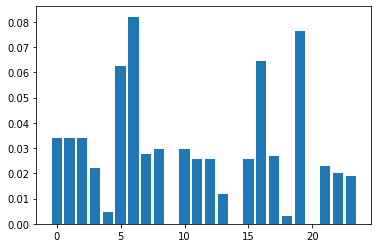

In [62]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
# feature selection
X_train_fs, X_test_fs, fs = select_features1(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [63]:
print('The features with high score:')
print(', '.join([X.columns[1],X.columns[2],X.columns[5],X.columns[6],X.columns[8],X.columns[16],X.columns[19]]))

The features with high score:
l1, l10, avg_height_m, avg_mt_km, temp_celcius, localyear, day_of_year


In [64]:
# X.columns[2],X.columns[3],X.columns[4],X.columns[6],X.columns[9],X.columns[16]

#### III. Feature selection using f_regression

In [65]:
def select_features2(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 46.119408
Feature 1: 36.872020
Feature 2: 44.609326
Feature 3: 41.251664
Feature 4: 36.973466
Feature 5: 1.684204
Feature 6: 0.747275
Feature 7: 0.225361
Feature 8: 17.134807
Feature 9: 20.589957
Feature 10: 9.081283
Feature 11: 1.866756
Feature 12: 8.957609
Feature 13: 1.890657
Feature 14: 2.155946
Feature 15: 4.811087
Feature 16: 66.296599
Feature 17: 22.443668
Feature 18: 28.294871
Feature 19: 26.583885
Feature 20: 0.216874
Feature 21: 62.365909
Feature 22: 8.993176
Feature 23: 31.029561


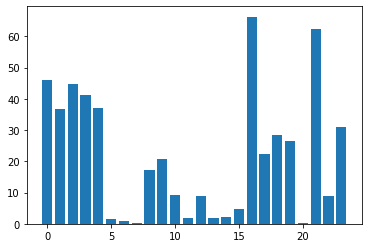

In [66]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
# feature selection
X_train_fs, X_test_fs, fs = select_features2(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [67]:
print('The features with high scores:')
print(', '.join([X.columns[0],X.columns[1],X.columns[2],X.columns[3],X.columns[4], X.columns[16], X.columns[21]]))

The features with high scores:
dBAS_lin_mean, l1, l10, l5, l90, localyear, s_juanCarlos


In [68]:
# X.columns[5],X.columns[12],X.columns[13],X.columns[15],X.columns[16],X.columns[18],X.columns[20]